In [1]:
# Imports
import os # folder path
import math
import cv2 # computer vision
import numpy as np # matrices
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Visualization
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import seaborn as sns
from matplotlib.colors import ListedColormap

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import neighbors, datasets, svm, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

# Deep Learning
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils, to_categorical
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.callbacks import EarlyStopping

# Print options
# import sys
# numpy.set_printoptions(threshold=sys.maxsize)

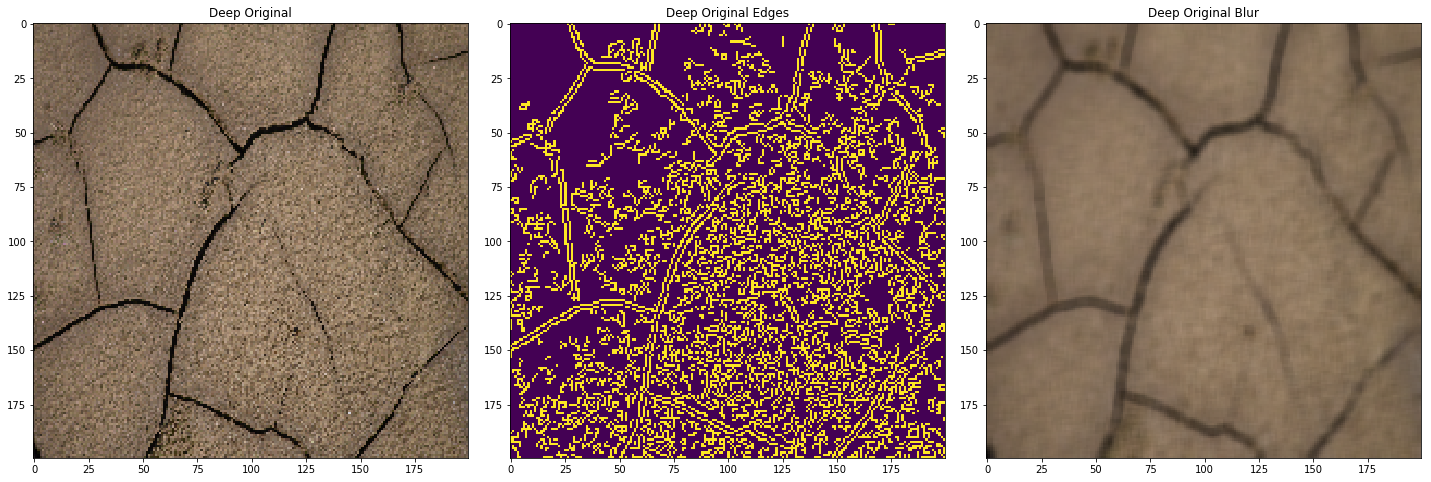

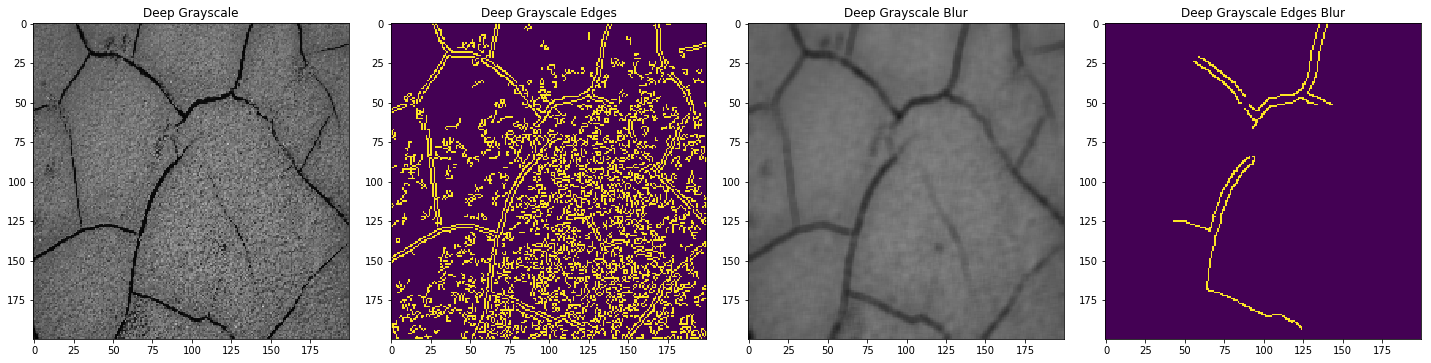

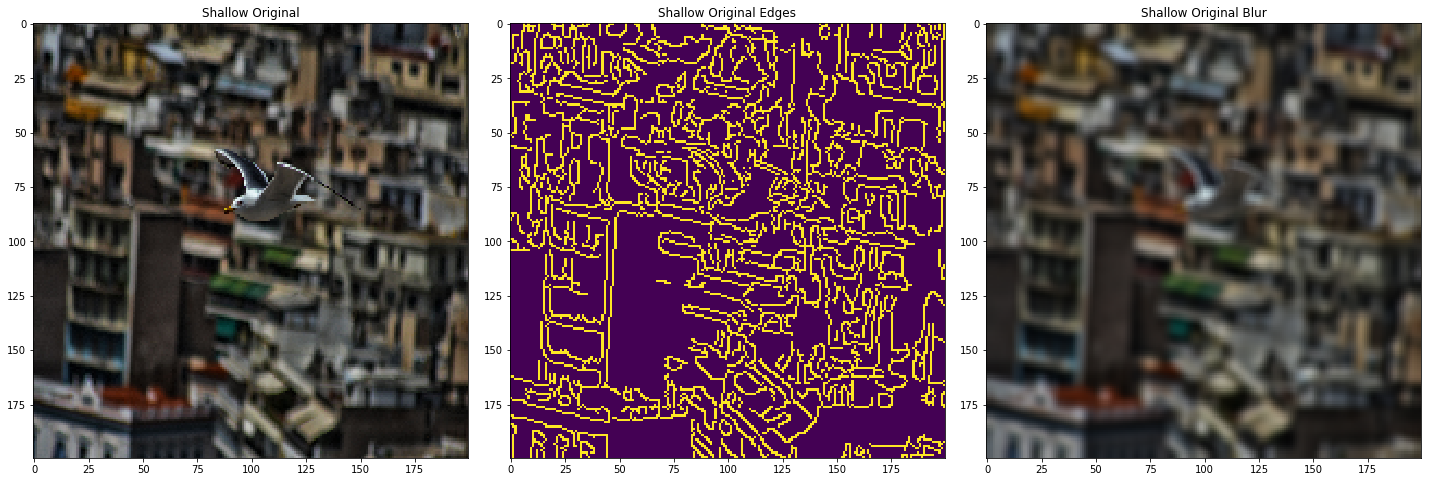

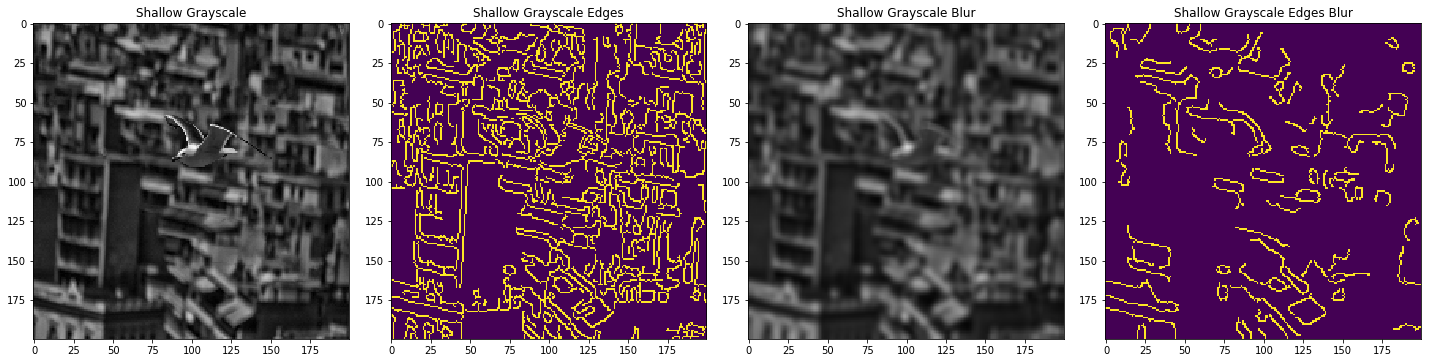

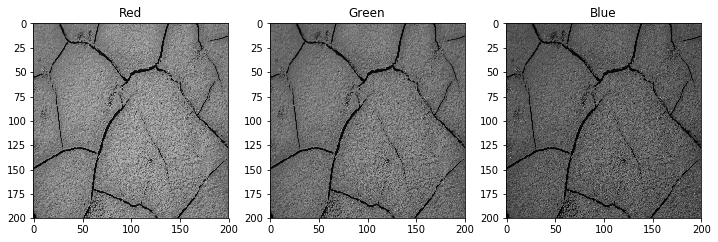

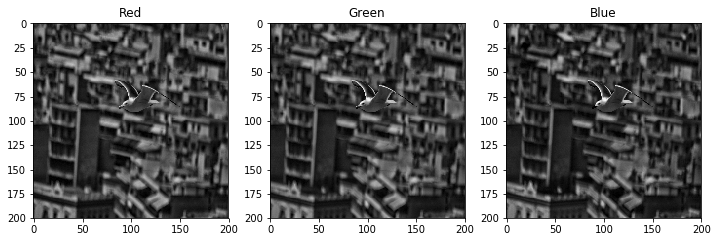

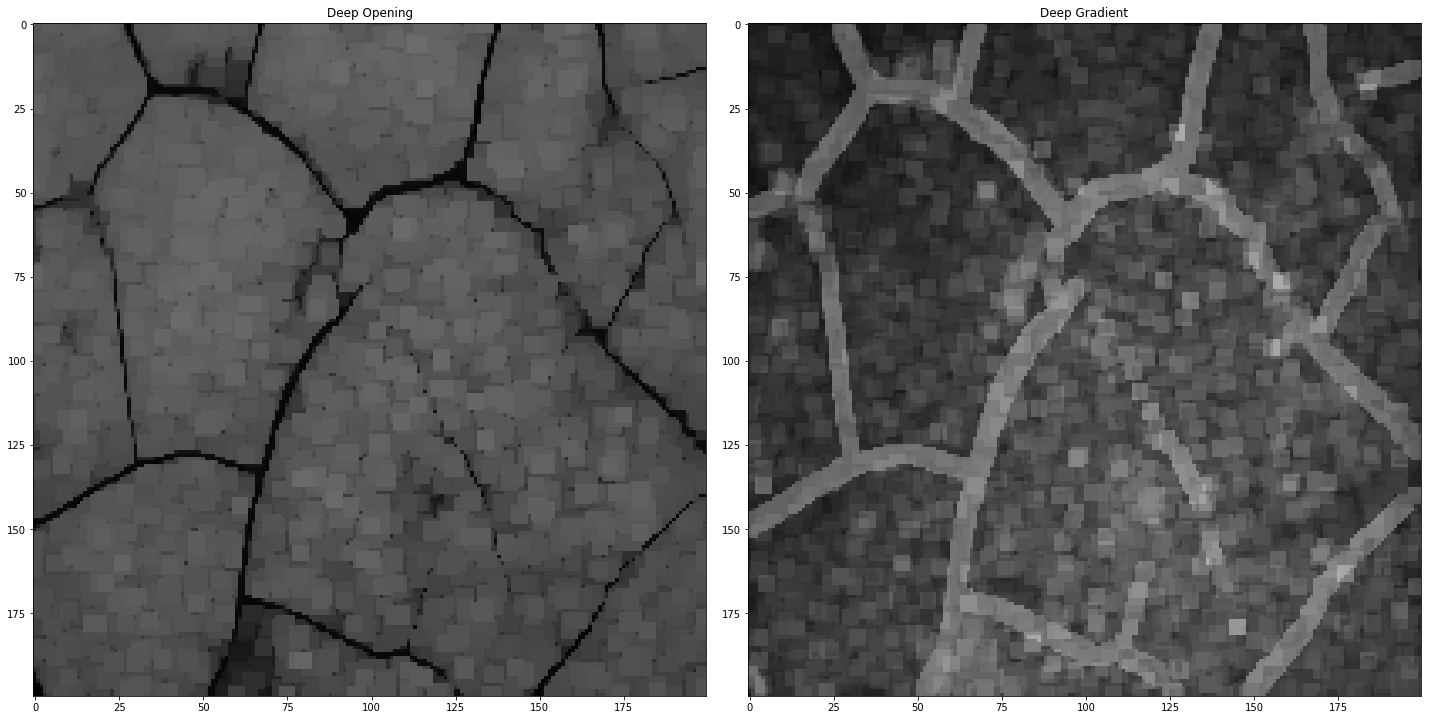

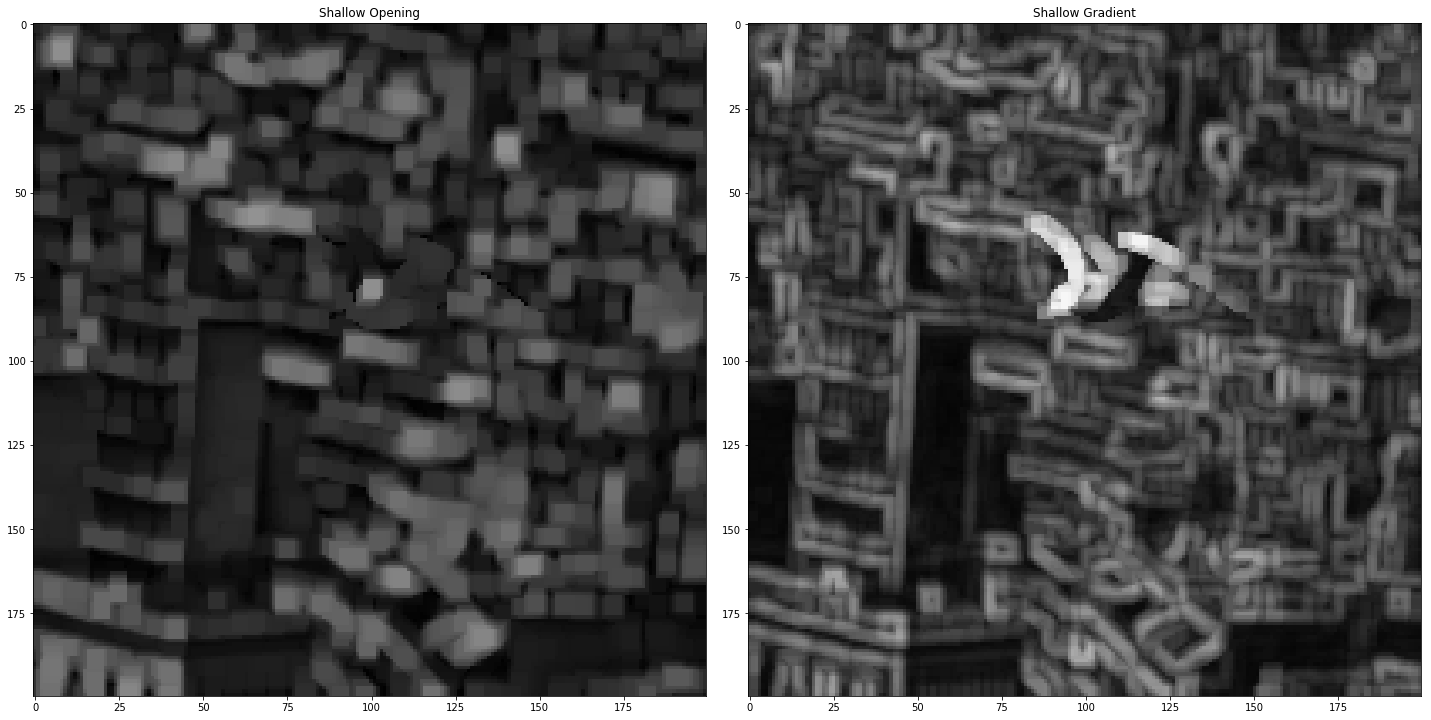

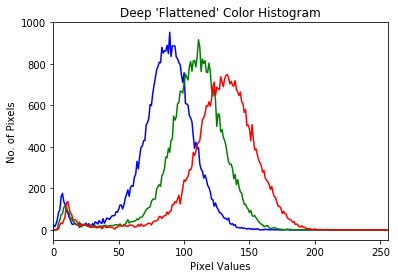

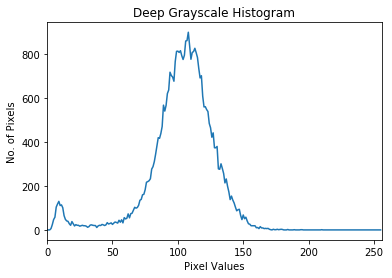

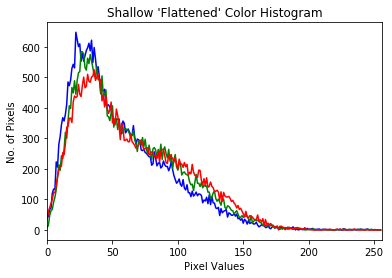

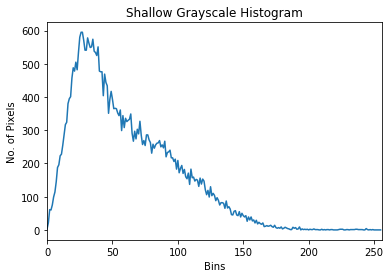

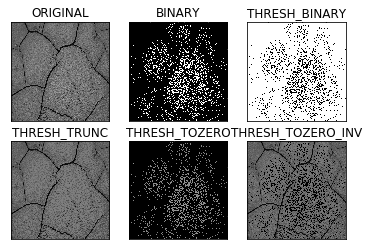

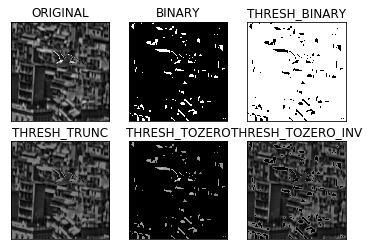

In [2]:
# Load two images, one Deep DoF and one Shallow DoF (hand crafted)
# Apply different computer vision techniques so to find a good representation for Deep and Shallow
# RGB / Grayscale / Blur / Edges / Morpholocial / Histograms / Thresholds

# cv2.Blur: Averaging Blur (noise reduction)
# (takes the average of all the pixels under kernel area and replaces the central element with this average)

# cv2.Canny: 5x5 Gaussian filter (noise reduction) -> 
#            Sobel kernel (first derivative which gives 255 near edges) ->
#            Non-maximum Suppression (local maximum for each pixel, if not make it zero)
#            Hysteresis Thresholding (min, max threshold values. Above max = edges, Below min = non-edges)

# Canny does use two thresholds (upper and lower):
# If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
# If a pixel gradient value is below the lower threshold, then it is rejected.
# If the pixel gradient is between the two thresholds, then it will be accepted only 
# if it is connected to a pixel that is above the upper threshold.

# cv2.morphologyEx (Grayscale): 
#   Opening: Erosion -> Dilation
#   Gradient: Difference between dilation and erosion of an image 
#      Erosion: A pixel is ‘1’ only if all the pixels under the kernel is ‘1’
#      Dilation: A pixel is ‘1’ if atleast one pixel under the kernel is ‘1’

# cv2.calcHist (images, channels, mask, histSize, ranges[, hist[, accumulate])

# cv2.threshold (Grayscale):
#   If pixel value < 127 set it to 0, else 255

folder_path = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/mine'

# for index, file_name in enumerate(os.listdir(folder_path)):
# image_path = folder_path + '/' + file_name
deep_image_path = folder_path + '/' + 'deep.jpg'
shallow_image_path = folder_path + '/' + 'shallow.jpg'

# Image Preprocessing Deep VS Shallow
deep_img = cv2.imread(deep_image_path)
deep_resized_image = cv2.resize(deep_img, (200, 200))
shallow_img = cv2.imread(shallow_image_path)
shallow_resized_image = cv2.resize(shallow_img, (200, 200))

# Deep - RGB / Grayscale / Edges / Blur
deep_RGB = cv2.cvtColor(deep_resized_image, cv2.COLOR_BGR2RGB)
deep_gray = cv2.cvtColor(cv2.cvtColor(deep_RGB, cv2.COLOR_BGR2GRAY), cv2.COLOR_BGR2RGB)
deep_RGB_edges = cv2.Canny(deep_RGB,100,200)
deep_gray_edges = cv2.Canny(deep_gray,100,200)
deep_RGB_blur = cv2.blur(deep_RGB,(5,5))
deep_gray_blur = cv2.blur(deep_gray,(5,5))
deep_gray_edges_blur = cv2.Canny(deep_gray_blur,100,200)

# Shallow - RGB / Grayscale / Edges / Blur
shallow_RGB = cv2.cvtColor(shallow_resized_image, cv2.COLOR_BGR2RGB)
shallow_gray = cv2.cvtColor(cv2.cvtColor(shallow_RGB, cv2.COLOR_BGR2GRAY), cv2.COLOR_BGR2RGB)
shallow_RGB_edges = cv2.Canny(shallow_RGB,100,200)
shallow_gray_edges = cv2.Canny(shallow_gray,100,200)
shallow_RGB_blur = cv2.blur(shallow_RGB,(5,5))
shallow_gray_blur = cv2.blur(shallow_gray,(5,5))
shallow_gray_edges_blur = cv2.Canny(shallow_gray_blur,100,200)

# Deep RGB Plots
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
fig.tight_layout()
ax[0].imshow(deep_RGB)
ax[0].set_title("Deep Original")
ax[1].imshow(deep_RGB_edges)
ax[1].set_title("Deep Original Edges")
ax[2].imshow(deep_RGB_blur)
ax[2].set_title("Deep Original Blur")
plt.show()

# Deep Grayscale Plots
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
fig.tight_layout()
ax[0].imshow(deep_gray)
ax[0].set_title("Deep Grayscale")
ax[1].imshow(deep_gray_edges)
ax[1].set_title("Deep Grayscale Edges")
ax[2].imshow(deep_gray_blur)
ax[2].set_title("Deep Grayscale Blur")
ax[3].imshow(deep_gray_edges_blur)
ax[3].set_title("Deep Grayscale Edges Blur")
plt.show()

# Shallow RGB Plots
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
fig.tight_layout()
ax[0].imshow(shallow_RGB)
ax[0].set_title("Shallow Original")
ax[1].imshow(shallow_RGB_edges)
ax[1].set_title("Shallow Original Edges")
ax[2].imshow(shallow_RGB_blur)
ax[2].set_title("Shallow Original Blur")
plt.show()

# Shallow Grayscale Plots
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
fig.tight_layout()
ax[0].imshow(shallow_gray)
ax[0].set_title("Shallow Grayscale")
ax[1].imshow(shallow_gray_edges)
ax[1].set_title("Shallow Grayscale Edges")
ax[2].imshow(shallow_gray_blur)
ax[2].set_title("Shallow Grayscale Blur")
ax[3].imshow(shallow_gray_edges_blur)
ax[3].set_title("Shallow Grayscale Edges Blur")
plt.show()

# Deep R G B plots
b, g, r = cv2.split(deep_resized_image)
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
fig.tight_layout()
ax[0].imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
ax[0].set_title("Red")
ax[1].imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
ax[1].set_title("Green")
ax[2].imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
ax[2].set_title("Blue")

# Shallow R G B plots
b, g, r = cv2.split(shallow_resized_image)
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
fig.tight_layout()
ax[0].imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
ax[0].set_title("Red")
ax[1].imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
ax[1].set_title("Green")
ax[2].imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
ax[2].set_title("Blue")

# Deep Morphological Transformations
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
fig.tight_layout()
kernel = np.ones((5,5),np.uint8)
ax[0].imshow(cv2.morphologyEx(deep_gray, cv2.MORPH_OPEN, kernel))
ax[0].set_title("Deep Opening")
ax[1].imshow(cv2.morphologyEx(deep_gray, cv2.MORPH_GRADIENT, kernel))
ax[1].set_title("Deep Gradient")
plt.show()

# Shallow Morphological Transformations
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
fig.tight_layout()
kernel = np.ones((5,5),np.uint8)
ax[0].imshow(cv2.morphologyEx(shallow_gray, cv2.MORPH_OPEN, kernel))
ax[0].set_title("Shallow Opening")
ax[1].imshow(cv2.morphologyEx(shallow_gray, cv2.MORPH_GRADIENT, kernel))
ax[1].set_title("Shallow Gradient")
plt.show()

# Deep RGB Histogram
channels = cv2.split(deep_resized_image)
colors = ("b", "g", "r")
plt.figure()
plt.title("Deep 'Flattened' Color Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("No. of Pixels")
features = []
# loop over the image channels
for (channel, color) in zip(channels, colors):
    # create a histogram for the current channel and concatenate the resulting histograms for each channel
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    features.extend(hist)
    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

# Deep Grayscale Histogram
hist = cv2.calcHist([deep_gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Deep Grayscale Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("No. of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# Shallow RGB Histogram
channels = cv2.split(shallow_resized_image)
colors = ("b", "g", "r")
plt.figure()
plt.title("Shallow 'Flattened' Color Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("No. of Pixels")
features = []
# loop over the image channels
for (channel, color) in zip(channels, colors):
    # create a histogram for the current channel and concatenate the resulting histograms for each channel
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    features.extend(hist)
    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

# Shallow Grayscale Histogram
hist = cv2.calcHist([shallow_gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Shallow Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("No. of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
    
# Deep Edges Histogram
hist = cv2.calcHist([cv2.Canny(deep_resized_image,100,200)], [0], None, [256], [0, 256])
plt.figure()
plt.title("Deep Edges Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("No. of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# # Deep Thresholds
ret,thresh_binary = cv2.threshold(deep_gray,127,255,cv2.THRESH_BINARY) 
ret,thresh_binary_inv = cv2.threshold(deep_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(deep_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(deep_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(deep_gray,127,255,cv2.THRESH_TOZERO_INV)
#DISPLAYING THE DIFFERENT THRESHOLDING STYLES using OpenCV
names = ['ORIGINAL','BINARY','THRESH_BINARY','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = deep_gray,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
# Shallow Edges Histogram
hist = cv2.calcHist([cv2.Canny(shallow_resized_image,100,200)], [0], None, [256], [0, 256])
plt.figure()
plt.title("Shallow Edges Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("No. of Pixels")
plt.plot(hist)
plt.xlim([0, 256])    
    
# Shallow Thresholds
ret,thresh_binary = cv2.threshold(shallow_gray,127,255,cv2.THRESH_BINARY) 
ret,thresh_binary_inv = cv2.threshold(shallow_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(shallow_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(shallow_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(shallow_gray,127,255,cv2.THRESH_TOZERO_INV)
#DISPLAYING THE DIFFERENT THRESHOLDING STYLES using OpenCV
names = ['ORIGINAL','BINARY','THRESH_BINARY','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = shallow_gray,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])

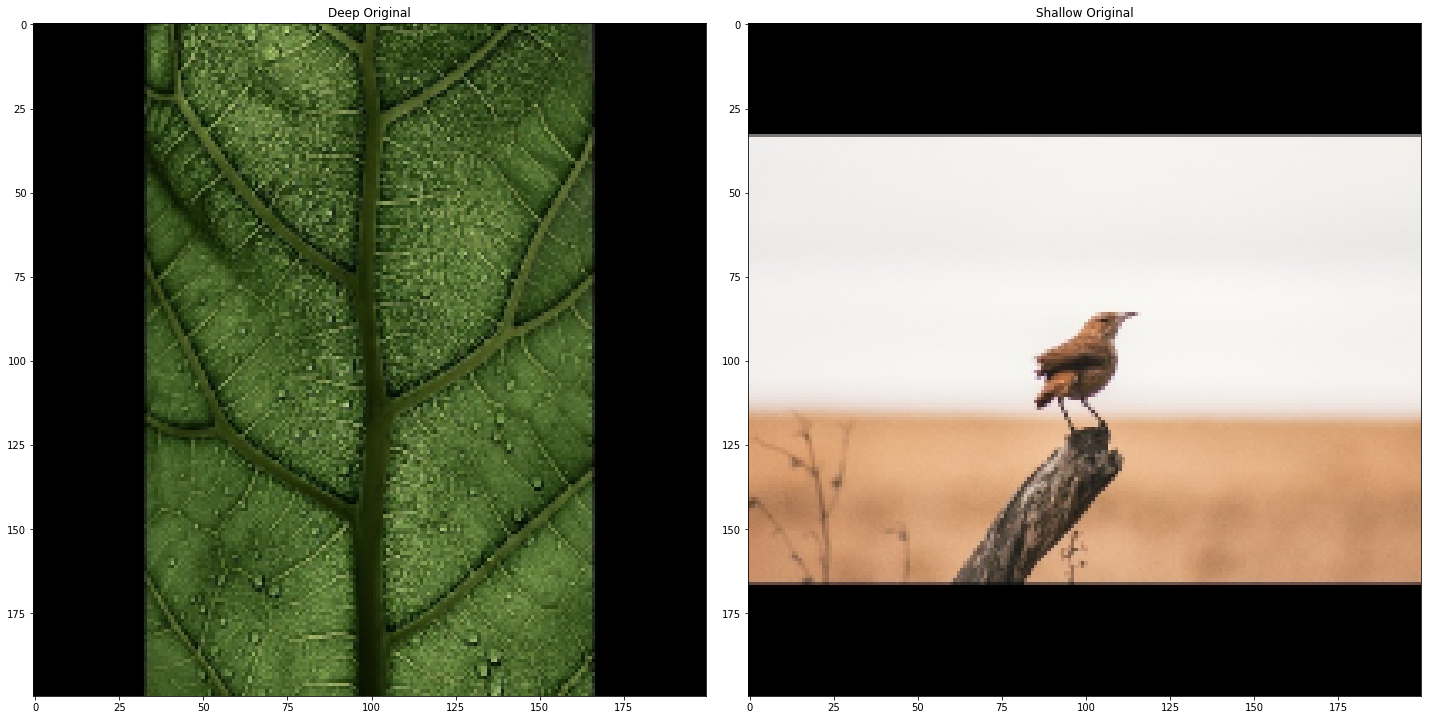

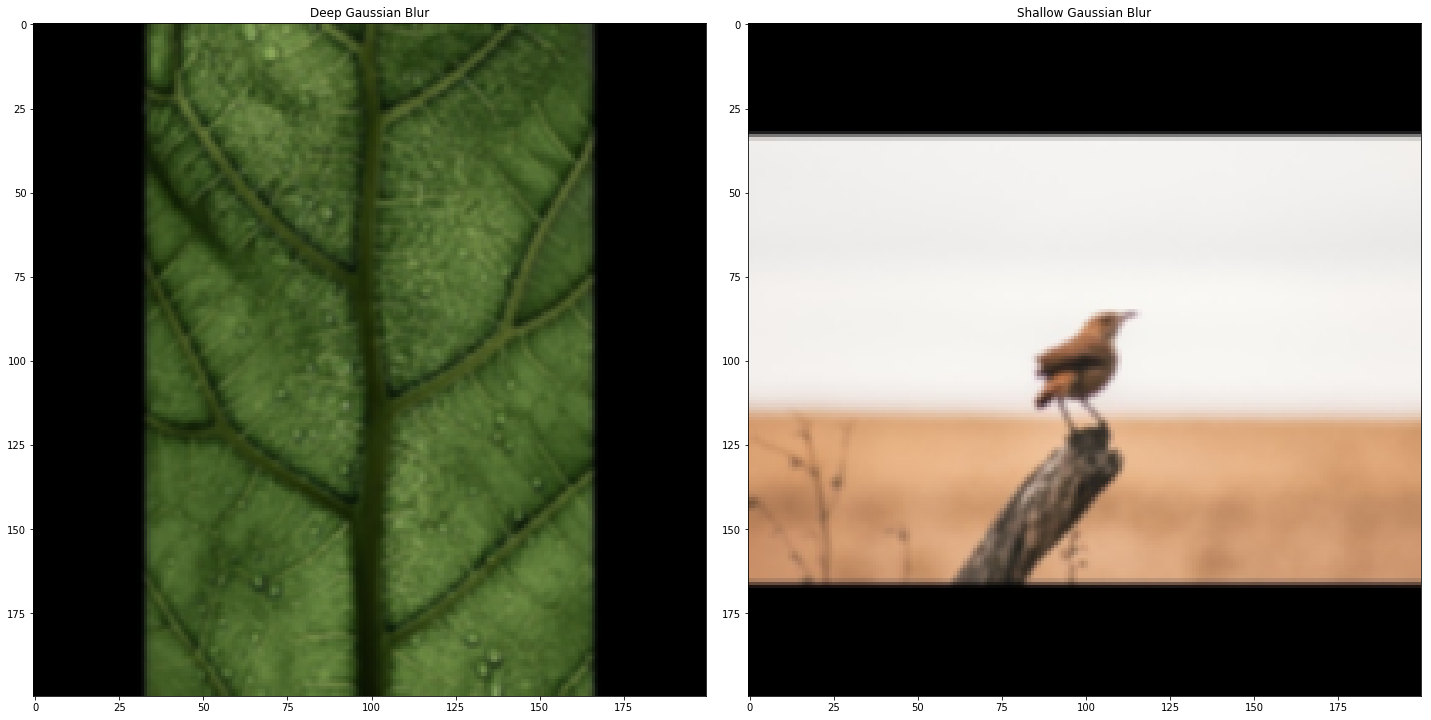

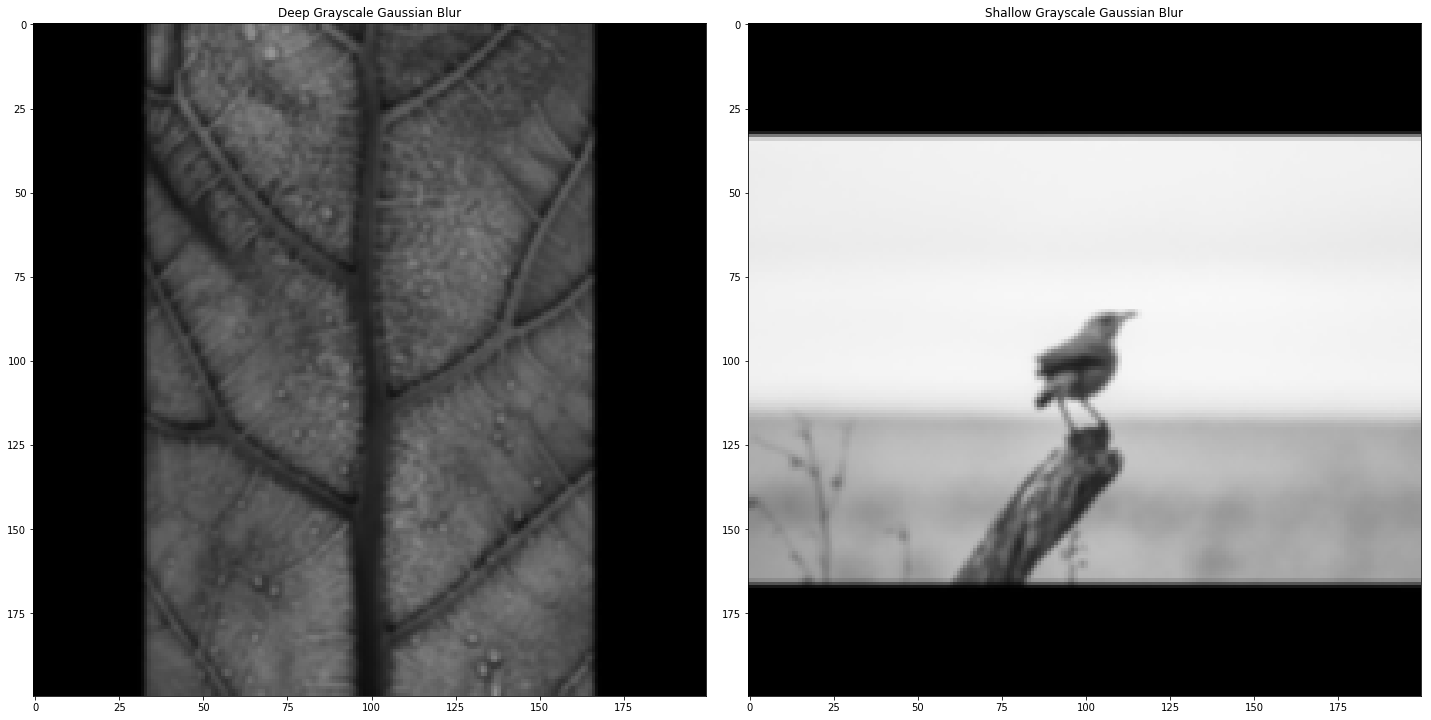

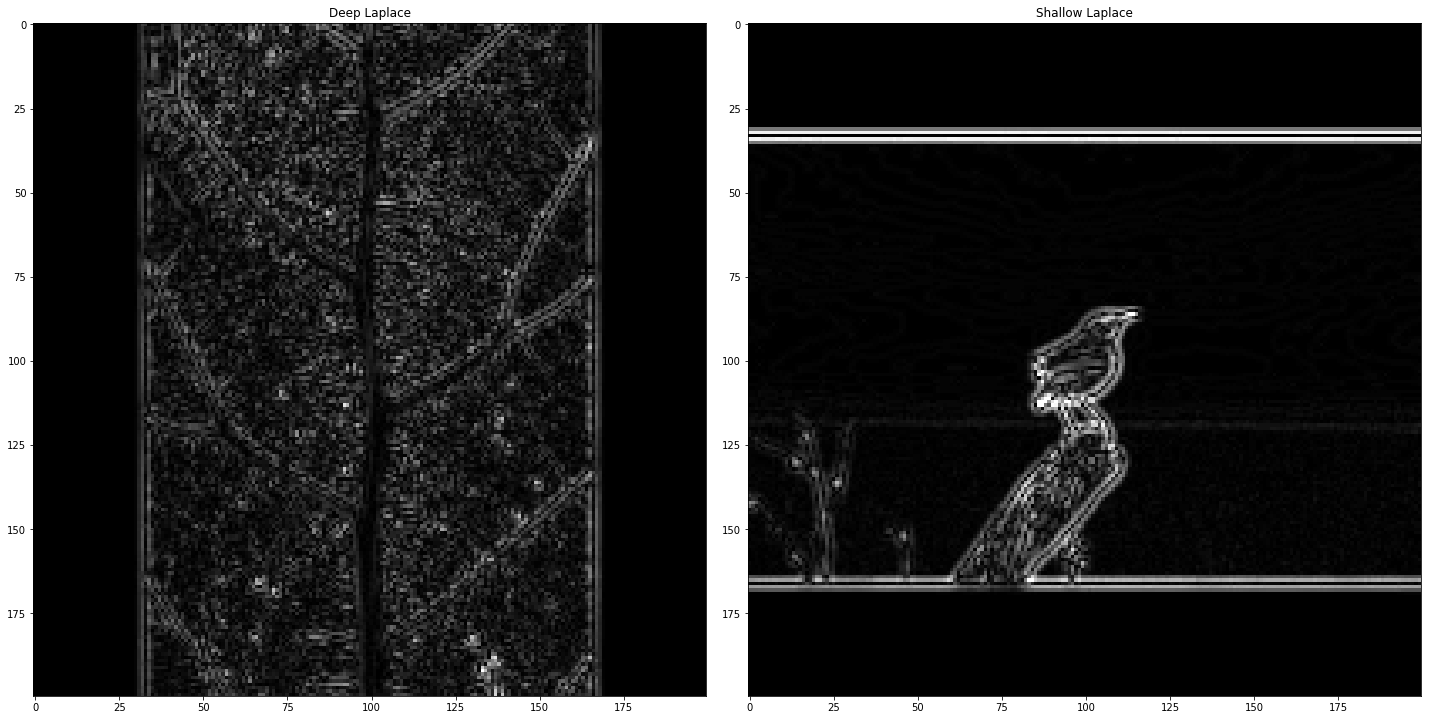

(0, 256)

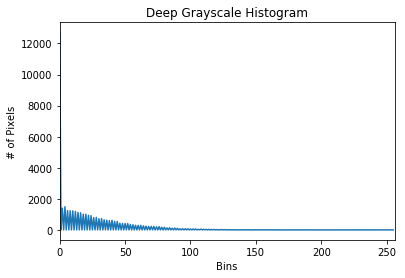

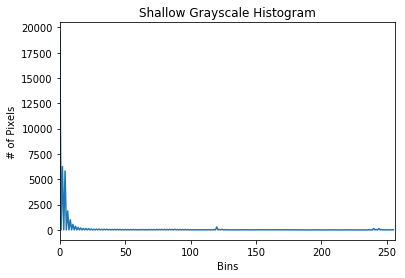

In [3]:
# Example of best sequence of transformation found:
#   Gaussian Blur -> Grayscale -> Laplacian
#   Histogram to showcase difference in pixels' bins

# cv2.GaussianBlur: a Gaussian kernel is a square array of pixels where the pixel values correspond 
#                   to the values of a Gaussian curve (in 2D).

# Laplacian operator example
folder_path_deep = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/Sharp'
folder_path_shallow = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/Blur'
deep_image_path = folder_path_deep + '/' + 'sharp1.jpg'
shallow_image_path = folder_path_shallow + '/' + 'blur1.jpg'
deep_img = cv2.imread(deep_image_path)
deep_resized_image = cv2.resize(deep_img, (200, 200))
shallow_img = cv2.imread(shallow_image_path)
shallow_resized_image = cv2.resize(shallow_img, (200, 200))


# Declare the variables we are going to use
# More bits = more colors = smoother gradient
ddepth = cv2.CV_16S # singed short to avoid overflow (for derivatives of image you need 16bit instead of 8bit)
kernel_size = 3 # kernel size of the Laplacian operator

# Load
src_deep = deep_resized_image
src_shallow = shallow_resized_image

# Remove noise by blurring with a Gaussian filter 
# (the pixel values correspond to the values of a Gaussian curve (in 2D))
# The role of sigma in the Gaussian filter is to control the variation around its mean value. 
# As the Sigma becomes larger the more variance allowed around mean 
# As the Sigma becomes smaller the less variance allowed around mean
src_deep = cv2.GaussianBlur(src_deep, (3, 3), 0) 
src_shallow = cv2.GaussianBlur(src_shallow, (3, 3), 0)

# Convert the image to grayscale
src_deep_gray = cv2.cvtColor(src_deep, cv2.COLOR_BGR2GRAY)
src_shallow_gray = cv2.cvtColor(src_shallow, cv2.COLOR_BGR2GRAY)

# Apply Laplace function
# (second derivative which gives zeroes near edges. To avoid other zeroes we use filtering)
dst_deep = cv2.Laplacian(src_deep_gray, ddepth, ksize=kernel_size)
dst_shallow = cv2.Laplacian(src_shallow_gray, ddepth, ksize=kernel_size)

# Converting back to 8-bit
abs_dst_deep = cv2.convertScaleAbs(dst_deep)
abs_dst_shallow = cv2.convertScaleAbs(dst_shallow)

# Display
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
fig.tight_layout()
ax[0].imshow(cv2.cvtColor(deep_resized_image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Deep Original")
ax[1].imshow(cv2.cvtColor(shallow_resized_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("Shallow Original")
plt.show()
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
fig.tight_layout()
ax[0].imshow(cv2.cvtColor(src_deep, cv2.COLOR_BGR2RGB))
ax[0].set_title("Deep Gaussian Blur")
ax[1].imshow(cv2.cvtColor(src_shallow, cv2.COLOR_BGR2RGB))
ax[1].set_title("Shallow Gaussian Blur")
plt.show()
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
fig.tight_layout()
ax[0].imshow(cv2.cvtColor(src_deep_gray, cv2.COLOR_BGR2RGB))
ax[0].set_title("Deep Grayscale Gaussian Blur")
ax[1].imshow(cv2.cvtColor(src_shallow_gray, cv2.COLOR_BGR2RGB))
ax[1].set_title("Shallow Grayscale Gaussian Blur")
plt.show()
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
fig.tight_layout()
ax[0].imshow(cv2.cvtColor(abs_dst_deep, cv2.COLOR_BGR2RGB))
ax[0].set_title("Deep Laplace")
ax[1].imshow(cv2.cvtColor(abs_dst_shallow, cv2.COLOR_BGR2RGB))
ax[1].set_title("Shallow Laplace")
plt.show()

# Histograms
hist = cv2.calcHist([abs_dst_deep], [0], None, [256], [0, 256])
plt.figure()
plt.title("Deep Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

hist = cv2.calcHist([abs_dst_shallow], [0], None, [256], [0, 256])
plt.figure()
plt.title("Shallow Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

In [4]:
# Apply Laplacian operator and split Dataset

folder_path_deep = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/deep_dof'
folder_path_shallow = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/shallow_dof'
folder_path_validate = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/validation_dof'

# Define train/test/validation arrays
X = []; y = []
X_wide = []
y_wide = []
X_shallow = []
y_shallow = []
X_pred = []

ddepth = cv2.CV_16S # we define ddepth = CV_16S to avoid overflow
kernel_size = 3 # kernel size of the Sobel operator

for file_name in os.listdir(folder_path_deep):
        image_path = folder_path_deep + '/' + file_name
        img = cv2.imread(image_path)
        resized_image = cv2.resize(img, (100, 100))

        # Remove noise by blurring with a Gaussian filter
        src = cv2.GaussianBlur(resized_image, (3, 3), 0)

        # Convert the image to grayscale
        src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

        # Apply Laplace function
        dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)

        # Converting back to 8-bit and flattening
        abs_dst = cv2.convertScaleAbs(dst).flatten()
        final = cv2.cvtColor(abs_dst, cv2.COLOR_BGR2RGB) # needed for plotting
        
        X_wide.append(np.asarray(abs_dst))
        y_wide.append(0) # 0 for deep
        
for file_name in os.listdir(folder_path_shallow):
        image_path = folder_path_shallow + '/' + file_name
        img = cv2.imread(image_path)
        resized_image = cv2.resize(img, (100, 100))

        # Remove noise by blurring with a Gaussian filter
        src = cv2.GaussianBlur(resized_image, (3, 3), 0)

        # Convert the image to grayscale
        src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

        # Apply Laplace function
        dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)

        # converting back to 8-bit and flattening
        abs_dst = cv2.convertScaleAbs(dst).flatten()
        final = cv2.cvtColor(abs_dst, cv2.COLOR_BGR2RGB) # needed for plotting
        
        X_shallow.append(np.asarray(abs_dst))
        y_shallow.append(1) # 1 for shallow
    

# Concat deep and shallow matrices to one.    
X = X_wide
y = y_wide
for i in X_shallow : 
    X.append(i)
for j in y_shallow:
    y.append(j)

    
# Split dataset 80-20 (400 Train, 100 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.8*len(X)), random_state=42)

/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



[INFO] evaluating raw pixel mean accuracy for k = 1 and algorithm = auto
[INFO] raw pixel mean accuracy: 64.00%
Train Accuracy: 1.0
Test Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.58      0.76      0.66        46
           1       0.72      0.54      0.62        54

   micro avg       0.64      0.64      0.64       100
   macro avg       0.65      0.65      0.64       100
weighted avg       0.66      0.64      0.64       100

[INFO] evaluating raw pixel mean accuracy for k = 2 and algorithm = auto
[INFO] raw pixel mean accuracy: 58.00%
Train Accuracy: 0.735
Test Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.52      0.98      0.68        46
           1       0.93      0.24      0.38        54

   micro avg       0.58      0.58      0.58       100
   macro avg       0.73      0.61      0.53       100
weighted avg       0.74      0.58      0.52       100

[INFO] evaluating raw pixel mean accurac

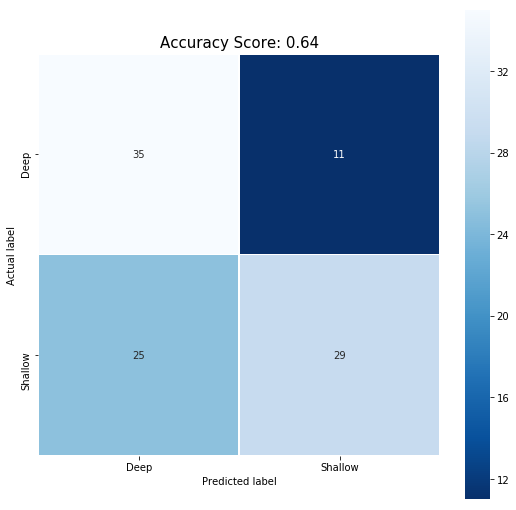

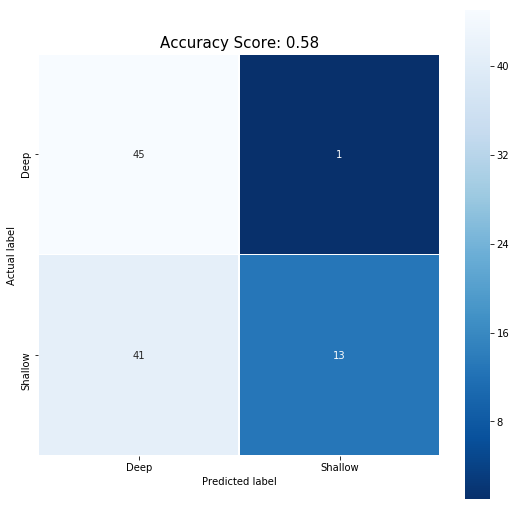

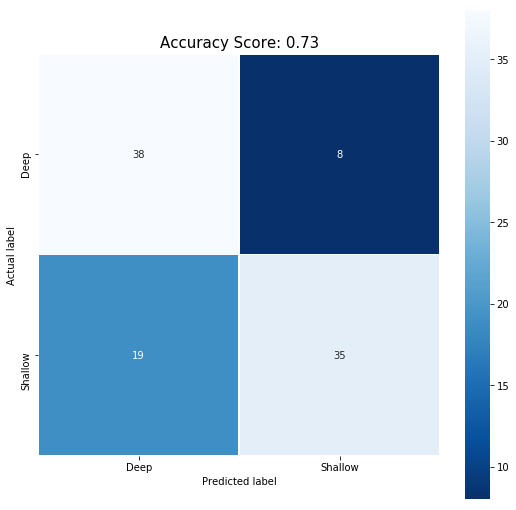

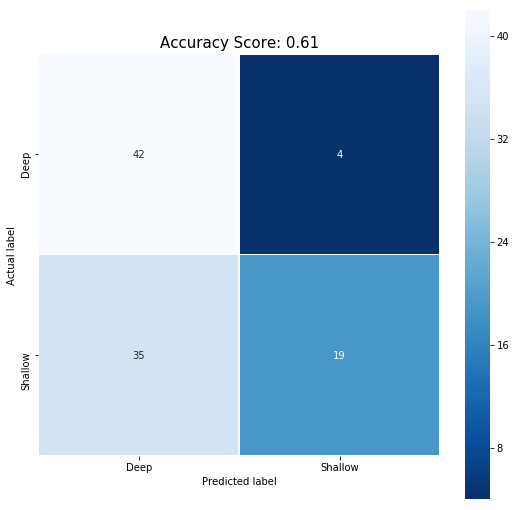

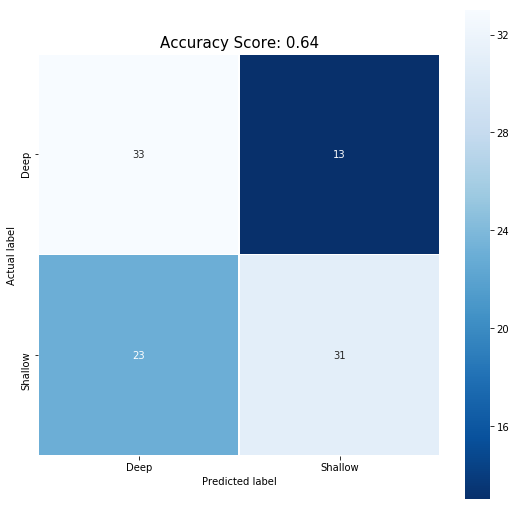

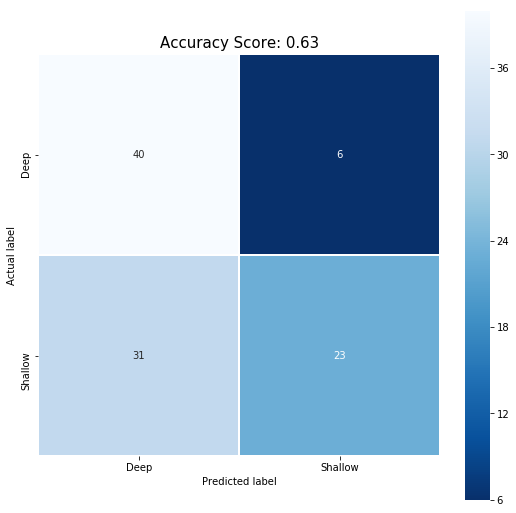

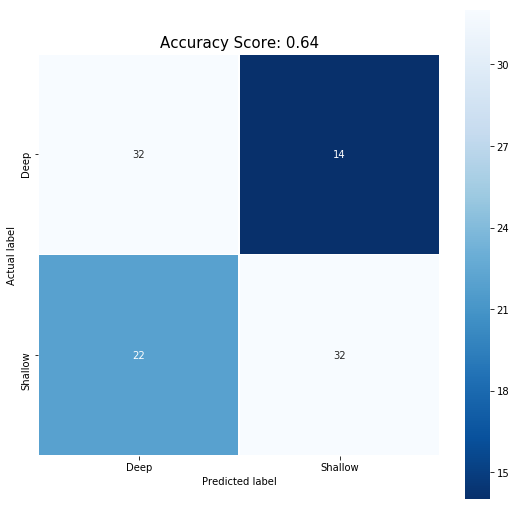

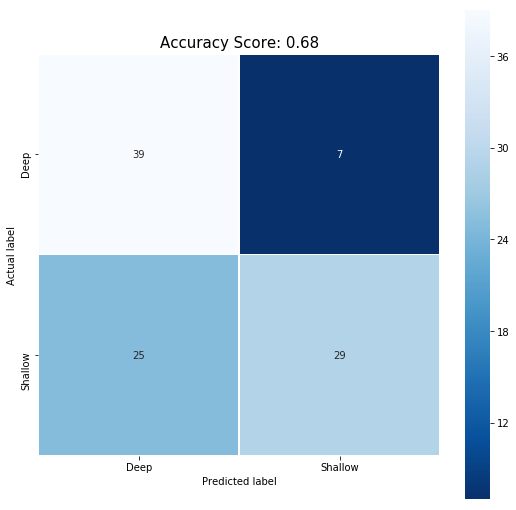

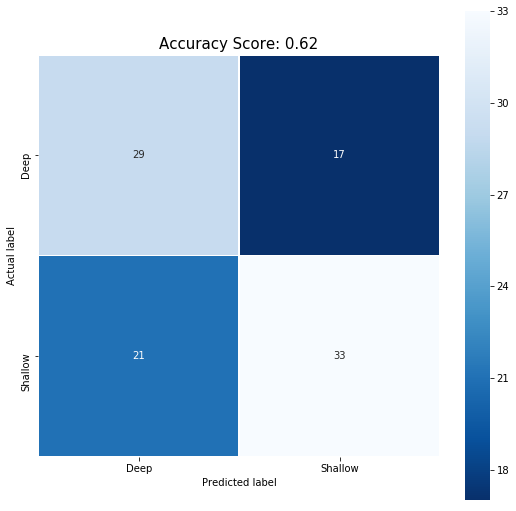

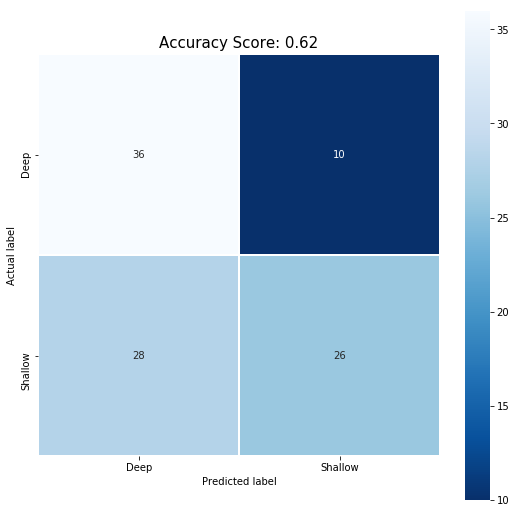

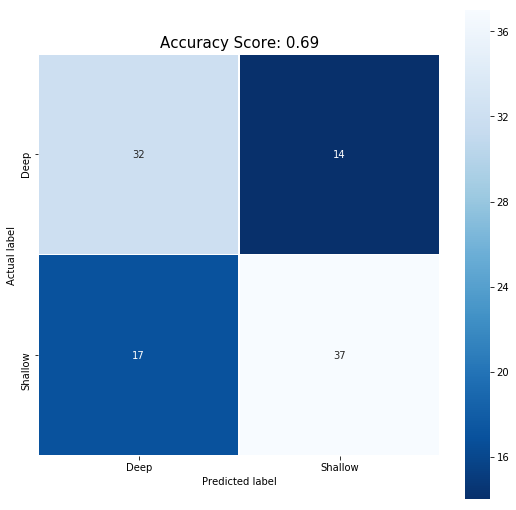

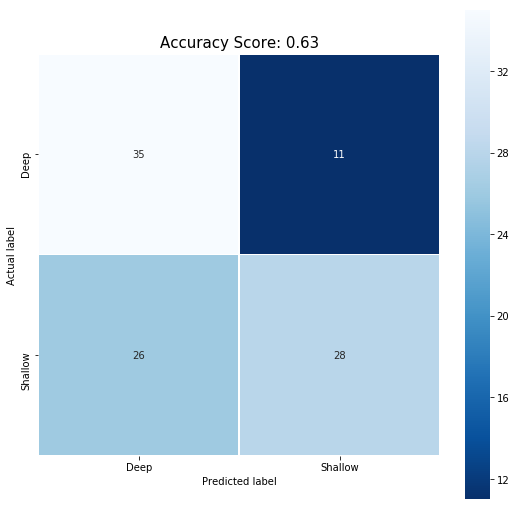

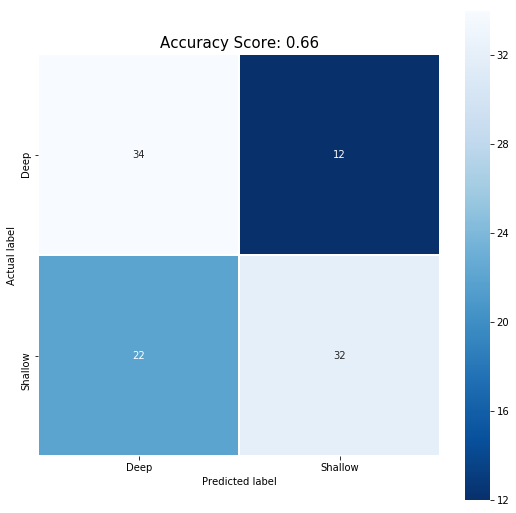

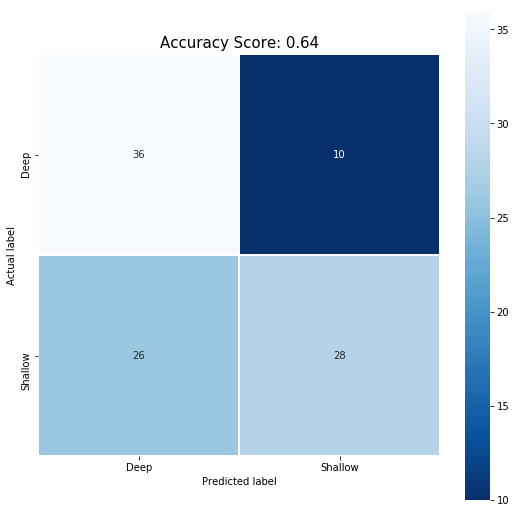

In [5]:
# kNN

# Define Metrics arrays
accuracy = []
precision = []
recall = []
f1 = []
iterations = 0
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
f1_sum = 0
s2_accuracy = []
s2_precision = []
s2_recall = []
s2_f1 = []
accuracy_s2_sum = 0
precision_s2_sum = 0
recall_s2_sum = 0
f1_s2_sum = 0

# find the best k for our algorithm
k_range = range(1,15)
k = 1
algorithms = ['auto'] # 'ball_tree', 'kd_tree', 'brute'
scores = {}
scores_list = []

for k in k_range:
    for al in algorithms:
        print("[INFO] evaluating raw pixel mean accuracy for k =", k, "and algorithm =", al)
        classifier = KNeighborsClassifier(n_neighbors=k, algorithm=al)
        # Fit the k-nearest neighbors classifier from the training dataset
        classifier.fit(X_train, y_train)
        # Return the mean accuracy on the given test data and labels
        acc = classifier.score(X_test, y_test)
        print("[INFO] raw pixel mean accuracy: {:.2f}%".format(acc * 100))

        print("Train Accuracy:",classifier.score(X_train, y_train))
        print("Test Accuracy:",classifier.score(X_test, y_test))
        
        # Different implementation, same results (with predict/accuracy_score)
        y_pred = classifier.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test, y_pred))
        
        cm = confusion_matrix(y_test,y_pred)
        plt.figure(figsize=(9,9))
        x_axis_labels = ['Deep', 'Shallow']
        y_axis_labels = ['Deep', 'Shallow']
        sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues_r')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test,y_pred))
        plt.title(all_sample_title,size=15)
        
        print(metrics.classification_report(y_test, y_pred))
        
        iterations += 1
        accuracy.append(metrics.accuracy_score(y_test, y_pred))
        precision.append(metrics.precision_score(y_test, y_pred))
        recall.append(metrics.recall_score(y_test, y_pred))
        f1.append(metrics.f1_score(y_test, y_pred))

for i in range(iterations):
    accuracy_sum += accuracy[i]
    precision_sum += precision[i]
    recall_sum += recall[i]
    f1_sum += f1[i]

accuracy_mean = accuracy_sum/iterations
precision_mean = precision_sum/iterations
recall_mean = recall_sum/iterations
f1_mean = f1_sum/iterations

for acc in accuracy:
    s2_accuracy.append(pow(abs(accuracy_mean - acc),2))
for prec in precision:
    s2_precision.append(pow(abs(precision_mean - acc),2))
for rec in recall:
    s2_recall.append(pow(abs(recall_mean - acc),2))
for f in f1:
    s2_f1.append(pow(abs(f1_mean - acc),2))
    
for i in range(iterations):
    accuracy_s2_sum += s2_accuracy[i]
    precision_s2_sum += s2_precision[i]
    recall_s2_sum += s2_recall[i]
    f1_s2_sum += s2_f1[i]

accuracy_s2 = accuracy_s2_sum/iterations
precision_s2 = precision_s2_sum/iterations
recall_s2 = recall_s2_sum/iterations
f1_s2 = f1_s2_sum/iterations

print("======================================================")
print("~~~~~~~~~~~~~~~~~~~~~~~ MEAN ~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Average Accuracy: " + str("%.2f" % accuracy_mean))
print("Average Precision: " + str("%.2f" % precision_mean))
print("Average Recall: " + str("%.2f" % recall_mean))
print("Average F1 Score: " + str("%.2f" % f1_mean))
print("~~~~~~~~~~~~~~~~ STANDARD DEVIATION ~~~~~~~~~~~~~~~~~~")
print("Standard Deviation of Accuracy: " + str("%.2f" % math.sqrt(accuracy_s2)))
print("Standard Deviation of Precision: " + str("%.2f" % math.sqrt(precision_s2)))
print("Standard Deviation of Recall: " + str("%.2f" % math.sqrt(recall_s2)))
print("Standard Deviation of F1 Score: " + str("%.2f" % math.sqrt(f1_s2)))
print("======================================================")

In [6]:
# Train / Test Accuracy for different C values for SVC

classifiers, train_acc, test_acc = [], [], []
Cs = [0.1, 0.5, 1, 10, 100, 1000]
for c in Cs:
    classifiers.append(svm.SVC(kernel='rbf', C=c, gamma='scale'))
    classifiers[-1].fit(X_train, y_train)
    y_pred = classifiers[-1].predict(X_train)
    train_acc.append(np.count_nonzero(y_train==y_pred) / len(y_pred))
    y_pred = classifiers[-1].predict(X_test)
    test_acc.append(np.count_nonzero(y_test==y_pred) / len(y_pred))

# Visualize:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter(x=np.log(Cs), y=train_acc, name='train accuracy',marker_size=5),
                      go.Scatter(x=np.log(Cs), y=test_acc, name='test accuracy',marker_size=5),],
                layout=go.Layout(title='Train and Validation accuracy vs model complexity',
                                           xaxis=dict(title="C (log)",), 
                                           yaxis=dict(title="Accuracy",)))
plotly.offline.iplot(fig)

Accuracy: 0.75
Precision: 0.8085106382978723
Recall: 0.7037037037037037
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        46
           1       0.81      0.70      0.75        54

   micro avg       0.75      0.75      0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100

~~~~~~~~~~~~~~~~~~~~~~~ MEAN ~~~~~~~~~~~~~~~~~~~~~~~~~
Average Accuracy: 0.75
Average Precision: 0.81
Average Recall: 0.70
Average F1 Score: 0.75
~~~~~~~~~~~~~~~~ STANDARD DEVIATION ~~~~~~~~~~~~~~~~~~
Standard Deviation of Accuracy: 0.00
Standard Deviation of Precision: 0.06
Standard Deviation of Recall: 0.05
Standard Deviation of F1 Score: 0.00


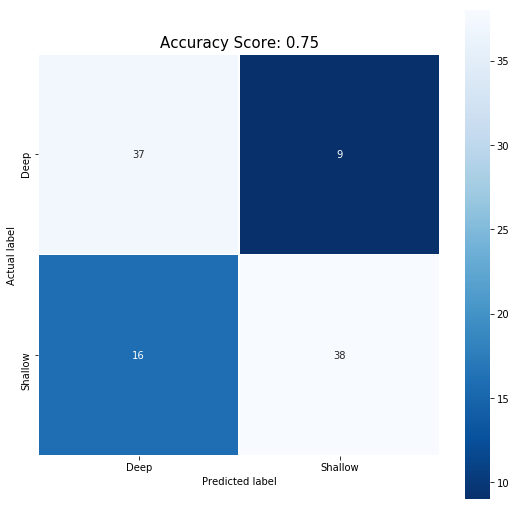

In [7]:
# SVC

# Define Metrics arrays
accuracy = []
precision = []
recall = []
f1 = []
iterations = 0
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
f1_sum = 0
s2_accuracy = []
s2_precision = []
s2_recall = []
s2_f1 = []
accuracy_s2_sum = 0
precision_s2_sum = 0
recall_s2_sum = 0
f1_s2_sum = 0

# kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] # same results for all kernels
kernels = ['rbf']

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=2, gamma='scale', probability=True) # RBF Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset    
y_pred = clf.predict(X_test) # Predict will give either 0 or 1 as output
y_pred_prob = clf.predict_proba(X_test) #  Predict_proba will give the only probability of 1.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
x_axis_labels = ['Deep', 'Shallow']
y_axis_labels = ['Deep', 'Shallow']
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title,size=15)


print(metrics.classification_report(y_test, y_pred))

iterations += 1
accuracy.append(metrics.accuracy_score(y_test, y_pred))
precision.append(metrics.precision_score(y_test, y_pred))
recall.append(metrics.recall_score(y_test, y_pred))
f1.append(metrics.f1_score(y_test, y_pred))

for i in range(iterations):
    accuracy_sum += accuracy[i]
    precision_sum += precision[i]
    recall_sum += recall[i]
    f1_sum += f1[i]

accuracy_mean = accuracy_sum/iterations
precision_mean = precision_sum/iterations
recall_mean = recall_sum/iterations
f1_mean = f1_sum/iterations

for acc in accuracy:
    s2_accuracy.append(pow(abs(accuracy_mean - acc),2))
for prec in precision:
    s2_precision.append(pow(abs(precision_mean - acc),2))
for rec in recall:
    s2_recall.append(pow(abs(recall_mean - acc),2))
for f in f1:
    s2_f1.append(pow(abs(f1_mean - acc),2))
    
for i in range(iterations):
    accuracy_s2_sum += s2_accuracy[i]
    precision_s2_sum += s2_precision[i]
    recall_s2_sum += s2_recall[i]
    f1_s2_sum += s2_f1[i]

accuracy_s2 = accuracy_s2_sum/iterations
precision_s2 = precision_s2_sum/iterations
recall_s2 = recall_s2_sum/iterations
f1_s2 = f1_s2_sum/iterations

print("======================================================")
print("~~~~~~~~~~~~~~~~~~~~~~~ MEAN ~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Average Accuracy: " + str("%.2f" % accuracy_mean))
print("Average Precision: " + str("%.2f" % precision_mean))
print("Average Recall: " + str("%.2f" % recall_mean))
print("Average F1 Score: " + str("%.2f" % f1_mean))
print("~~~~~~~~~~~~~~~~ STANDARD DEVIATION ~~~~~~~~~~~~~~~~~~")
print("Standard Deviation of Accuracy: " + str("%.2f" % math.sqrt(accuracy_s2)))
print("Standard Deviation of Precision: " + str("%.2f" % math.sqrt(precision_s2)))
print("Standard Deviation of Recall: " + str("%.2f" % math.sqrt(recall_s2)))
print("Standard Deviation of F1 Score: " + str("%.2f" % math.sqrt(f1_s2)))
print("======================================================")

In [8]:
# Precision-Recall & ROC Curves

class_names = ['Deep', 'Sharp']
colors = ['royalblue', 'orange']

# Precision Recall Curve
data_to_plot = []
for ic, c in enumerate(class_names):
    pre, rec, thres = metrics.precision_recall_curve(y_test, y_pred_prob[:, class_names.index(c)])
    data_to_plot.append(go.Scatter(x=thres, y=pre, line=dict(color=colors[ic], width=2, dash='dash'), 
                                   name=f'{c} - Precision'))
    data_to_plot.append(go.Scatter(x=thres, y=rec, line=dict(color=colors[ic], width=2), 
                                   name=f'{c} - Recall'))

fig = go.Figure(data=data_to_plot,layout=go.Layout(title='Precision vs Recall',
                                                   xaxis=dict(title="Threshold",),  yaxis=dict(title="Performance",)))
plotly.offline.iplot(fig)

# ROC Curve
data_to_plot = []
for ic, c in enumerate(class_names):
    fpr, tpr, thres = metrics.roc_curve(y_test, y_pred_prob[:, class_names.index(c)])
    auc_score = metrics.auc(fpr, tpr)
    data_to_plot.append(go.Scatter(x=fpr, y=tpr, line=dict(color=colors[ic], width=2, dash='dash'), 
                                   name=f'{c} - ROC - AUC={auc_score:.2f}'))
data_to_plot.append(go.Scatter(x=[0, 1], y=[0, 1], line=dict(color='gray', width=1, dash='dash'), name='baseline'))
fig = go.Figure(data=data_to_plot,layout=go.Layout(title='ROC',
                                                   xaxis=dict(title="false positive rate",),  
                                                   yaxis=dict(title="true positive rate",)))
plotly.offline.iplot(fig)

In [9]:
# CNN

# Load images
folder_path_deep = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/deep_dof'
folder_path_shallow = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/shallow_dof'

X_wide = []
y_wide = []
X_shallow = []
y_shallow = []
X_pred = []

for file_name in os.listdir(folder_path_deep):
    image_path = folder_path_deep + '/' + file_name
    img = cv2.imread(image_path)
    resized_image = cv2.resize(img, (200, 200))
    X_wide.append(np.asarray(resized_image))
    y_wide.append(0) # 0 for deep
    
for file_name in os.listdir(folder_path_shallow):
    image_path = folder_path_shallow + '/' + file_name
    img = cv2.imread(image_path)
    resized_image = cv2.resize(img, (200, 200))
    X_shallow.append(np.asarray(resized_image))
    y_shallow.append(1) # 1 for shallow

# Combine arraies together
X = np.concatenate((X_wide,X_shallow), axis=0)
y = np.concatenate((y_wide,y_shallow), axis=0)

# Normalization for CNN
X = np.stack(X)
X = X.astype('float32')
X = X/255

y = to_categorical(y)

np.array(X).shape
np.array(y).shape

# CNN Training

# define the data and key parameters in the model
labels = 2

X.shape
y.shape

# Within the total data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.8*len(X)), random_state=42)

print('Dimensions\n---')
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

# Modeling
input_dimension = (200, 200, 3)

model = Sequential()

# Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_dimension))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # to avoid overfitting

# Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())

# Layer 3
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))

# Layer 4
model.add(Dense(labels, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Training
model.fit(X_train, y_train,
          batch_size=20,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))


# CNN Testing
score = model.evaluate(X_test, y_test, verbose=1)
print('accuracy: ',score[1])
print('loss: ',score[0])

folder_path_test = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/validation_dof'

# CNN Validation
for file_name in os.listdir(folder_path_test):
    test_pic= []
    
    image_path = folder_path_test + '/' + file_name
    img = image.load_img(image_path, target_size=(200, 200))
    test_pic.append(np.asarray(img))
    test_pic = np.stack(test_pic)/255.

    result = (model.predict(test_pic) > 0.5).astype("int32")
    proba = model.predict(test_pic)
    print(result, proba)

/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



Dimensions
---
X_train (400, 200, 200, 3)
X_test (100, 200, 200, 3)
y_train (400, 2)
y_test (100, 2)
Epoch 1/10
20/20 [==============================] - 20s 966ms/step - loss: 1.8978 - accuracy: 0.5103 - val_loss: 0.6831 - val_accuracy: 0.5800
Epoch 2/10
20/20 [==============================] - 18s 913ms/step - loss: 0.6583 - accuracy: 0.5815 - val_loss: 0.6235 - val_accuracy: 0.6800
Epoch 3/10
20/20 [==============================] - 18s 876ms/step - loss: 0.5964 - accuracy: 0.7186 - val_loss: 0.6353 - val_accuracy: 0.7200
Epoch 4/10
20/20 [==============================] - 18s 881ms/step - loss: 0.5556 - accuracy: 0.7283 - val_loss: 0.5541 - val_accuracy: 0.7600
Epoch 5/10
20/20 [==============================] - 18s 879ms/step - loss: 0.4923 - accuracy: 0.7583 - val_loss: 0.5098 - val_accuracy: 0.7600
Epoch 6/10
20/20 [==============================] - 18s 880ms/step - loss: 0.4346 - accuracy: 0.8162 - val_loss: 0.4441 - val_accuracy: 0.8100
Epoch 7/10
20/20 [=======================

In [ ]:
# Data Augmentation via Image Transformation (Rotation)

folder_path_deep = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/deep_dof'
folder_path_shallow = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/shallow_dof'
directory = '/home/mike/Artificial Intelligence MSc/2. Machine Learning/1. Giannakopoulos/Exercises/Images/deep_dof_inverse'

for file_name in os.listdir(folder_path_deep):
    image_path = folder_path_deep + '/' + file_name
    img = cv2.imread(image_path)
    transformed_image = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
    
    print("Before saving image:")   
    print(os.listdir(directory)) 
    cv2.imwrite(directory+'/'+'rotated'+file_name, transformed_image)
    print("After saving image:")   
    print(os.listdir(directory)) 